In [2]:
import sys
import os
from pathlib import Path

sys.path.append(Path.cwd().parent.joinpath("source").as_posix())

from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from PIL import Image
import mvalab
import utils
import random
random.seed(1)

def read_tiff(chemin):
    dataset = gdal.Open(chemin)
    for x in range(1, dataset.RasterCount + 1):
        band = dataset.GetRasterBand(x)
        array = band.ReadAsArray()
    return array.astype(np.float64)

def plot_sar(ima):
    plt.figure(figsize=(12,12))
    t = np.mean(ima)+3*np.std(ima)
    plt.imshow(np.clip(ima,0,t),cmap='gray')
    plt.show()

def save_tiff(img, dir, path):
    im = Image.fromarray(img)
    save_path = os.path.join(dir, path)
    print(f"Saving image at {save_path}")
    im.save(save_path)

In [12]:
dir = '../images/'
path = 'rcr_s1a_18MUU_vv_ASC_120_20160124txxxxxx.tif'
x = 5000
# rcr = read_tiff('../images/rcr_s1a_18MUU_vv_ASC_120_20160124txxxxxx.tif')
im = read_tiff('../images/s1a_18MUU_vv_ASC_120_20150222txxxxxx.tif')
# im = read_tiff('../images/s1a_18MUU_vv_ASC_120_20150222txxxxxx.tif')[x:x+1000,x:x+1000]
index_shadows = read_tiff('../images/detected_shadows_image_indexes.tif')
epsilon = 1e-7

In [13]:
print(np.mean(im), np.std(im))

0.2693233016465355 0.28966151507487664


3.707878828048706


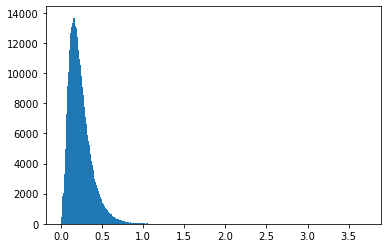

In [11]:
plt.hist(im.flatten(), bins=1000)
print(np.max(im))

In [9]:
print(len(np.where(im != 0)[0]))

save_tiff(im != 0, dir, 'im_test.tif')

625331
Saving image at ../images/im_test.tif


In [5]:
rcr_log = 10 * np.log10(rcr + epsilon)
# rcr_log += np.min(rcr_log)
# save_tiff(rcr_log, dir, "log_image.tiff")
print(rcr_log[:10,:10])

[[-0.95658359 -0.29060868 -1.56694951  0.02183978  1.15015755  2.04135903
  -1.08159878 -1.43778671  0.74490108  0.75825541]
 [-1.91575639 -3.17398538 -1.29321086  0.40471582  0.40901659 -0.26923904
  -1.02871121 -0.69979929  0.53739375  1.62913631]
 [ 1.14930216 -1.72039622  1.00105801  0.97772085  0.50596013 -0.74968016
  -0.77859213  0.65321791  2.32894103  1.16277457]
 [ 1.68346555  1.40603507  2.2437436   1.37157079  1.0325866  -1.80677755
  -1.68065077 -0.25048962  1.67812586  0.99386947]
 [ 1.72912309  1.79797452  3.64551204  0.22330107  0.35284426  0.81658755
  -0.54121596 -0.5900565   1.0236713   2.70362896]
 [-0.29250334 -1.28678552  0.76454298  2.27988347  0.12754462  1.36520798
   1.46103023 -0.0160973   0.35254497  3.46756959]
 [-1.91663529 -1.5976703  -1.35376317  1.0743195   1.1904323   1.872068
   1.8737239   1.44580097  1.17360064  0.49382362]
 [ 1.33812032  0.51345294 -1.03001671  2.18917905  2.92735124  2.45185521
   0.76822301  0.11082315 -0.38348086 -2.1631858 ]
 [

In [3]:
import seaborn as sn
print(np.max(index_shadows))
colors = np.array([[0,0,0]] + sn.color_palette("rocket",n_colors=int(np.max(index_shadows) +1)))

color_index_shadows = colors[index_shadows.astype(int) + 1]
# color_index_shadows = np.take(colors, index_shadows.astype(int))
print(color_index_shadows.shape, color_index_shadows.dtype, color_index_shadows[0,0])
# save_tiff(color_index_shadows, dir, "color_index_shadows.tiff")
plt.imsave( '../images/colored_index.png', color_index_shadows)


24.0
(10980, 10980, 3) float64 [0. 0. 0.]


In [ ]:
sn.color_palette("rocket", n_colors=int(np.max(index_shadows) +1))

[(0.05611171, 0.04224835, 0.13411624),
 (0.1125315, 0.06742194, 0.17414848),
 (0.16915387, 0.08682996, 0.21498104),
 (0.22741085, 0.10140876, 0.25340813),
 (0.2875374, 0.11191896, 0.28660853),
 (0.34940101, 0.11863987, 0.3138355),
 (0.40642019, 0.12151801, 0.33288464),
 (0.47114798, 0.12098721, 0.34787978),
 (0.53726173, 0.11587369, 0.35642903),
 (0.60444226, 0.10573912, 0.35820487),
 (0.67159578, 0.09306598, 0.35159077),
 (0.73669146, 0.08704683, 0.33543669),
 (0.7965014, 0.10506637, 0.31063031),
 (0.84335441, 0.14556683, 0.28480819),
 (0.88731387, 0.20469941, 0.25769539),
 (0.91978131, 0.27526191, 0.24245973),
 (0.93899289, 0.35250734, 0.25452808),
 (0.95001704, 0.42771398, 0.29244728),
 (0.95681685, 0.49882008, 0.34555431),
 (0.96077819, 0.55997184, 0.39941173),
 (0.96337949, 0.6255736, 0.46511271),
 (0.96479861, 0.68910113, 0.53756026),
 (0.96632832, 0.75055966, 0.61696136),
 (0.9698028, 0.80981139, 0.70252255),
 (0.97501782, 0.86821321, 0.78871034)]

In [11]:
def simple_equalization_8bit(im, percentiles=5):
    ''' im is a numpy array
        returns a numpy array
    '''

    ###     <<< CODE HERE >>>
    p, P = np.percentile(im, percentiles), np.percentile(im, 100 - percentiles)
    return np.array(np.clip((im-p) / (P-p) * 255, 0,255),dtype=int)  # return equalized image

def get_sentinel2_color_8bit(basefilename,  percentiles=5):
    ''' basefilename to store the bands:  basename+BAND+'.tif'
        returns a numpy array of the RGB image (height, width, channels)
    '''
    bands = ['B02', 'B03', 'B04']    # SENTINEL2 R,G,B BANDS

    # read, equalize, and stack all the channels
    out = np.zeros((10980,10980,3))
    for i,b in enumerate(bands):
        print(b)
        im = plt.imread('{}_{}.jp2'.format(basefilename, b))
        im = simple_equalization_8bit(im, percentiles)
        print(im.shape)
        out[:,:,i] = im
        
    return out.astype(np.uint8)


basename = "/home/soudini/storage/SAR_images/couleur/S2B_MSIL1C_20180921T152629_N0206_R025_T18MUU_20180921T204438.SAFE/GRANULE/L1C_T18MUU_A008059_20180921T152653/IMG_DATA/T18MUU_20180921T152629"
out_folder = "/home/soudini/storage/SAR_images/couleur/rgb/"
# generate the RGB image
RGBout = get_sentinel2_color_8bit(basename)

# Writes RGBout in 'rgb_RGB.tif' copying geolocation metadata from 'rgb_B03.tif',
# which has been written by    get_sentinel2_color_8bit
# utils.writeGTIFF(RGBout[:,:,0:3], basename+'_RGB.tif', basename+'_B03.tif')

# display RGBout
# vistools.display_imshow(RGBout[:,:,0:3], figsize=(10,10))
plt.imsave(os.path.join(out_folder, 'out.png'),RGBout)

B02


/usr/lib/python3.10/site-packages/PIL/Image.py:2896: DecompressionBombWarning: Image size (120560400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


(10980, 10980)
B03
(10980, 10980)
B04
(10980, 10980)
